<a href="https://colab.research.google.com/github/vicliv/Bandit-Problem/blob/main/BinomialBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinforcement Learning - HW1

Victor Livernoche - 260926276

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

**Q1**

In [ ]:
# Define the bernoulli bandit game
class Bandit:
  prob = []

  def __init__(self, probability):
    self.prob = probability # given probabilities
  
  def sample(self, i): # give the reward based on bernouilli
    return int(np.random.random() < self.prob[i])

**Q2**

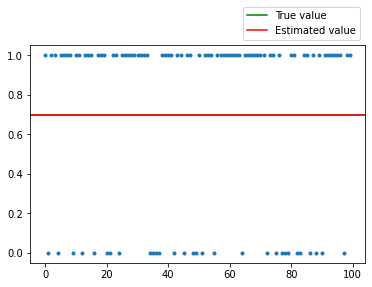

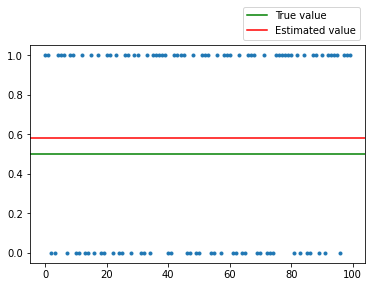

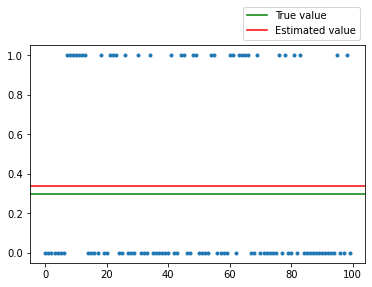

In [ ]:
probabilities = [0.7, 0.5, 0.3]

def run(showplots = False):
  bandit = Bandit(probabilities) # create bandit game with these probabilities
  results = [[], [], []]
  for i in range(0,3):
    for j in range(0,100):
      results[i].append(bandit.sample(i)) # get the reward of each arm

    if showplots:
      # plot all
      plt.plot(np.arange(100), results[i], '.')
      plt.axhline(y=probabilities[i], color='g', linestyle='-', label="True value")
      plt.axhline(y=np.mean(results[i]), color='r', linestyle='-', label="Estimated value")
      plt.legend(bbox_to_anchor=(1.0, 1.2))
      plt.show()
  return results
results = run(True)

**Q3**

In [ ]:
# The update function with an alpha parameter
def update(data, alpha = 0.1):
  Q = []
  for Rt in data:
    if (len(Q) == 0):
      Q.append(alpha*Rt)
    else:
      Q.append(Q[-1]+alpha*(Rt-Q[-1]))

  return Q

# The average incrementation function
def updateAVG(data):
  Q = []
  for Rt in data:
    if (len(Q) == 0):
      Q.append(Rt)
    else:
      Q.append(Q[-1]+1/len(Q)*(Rt-Q[-1]))

  return Q

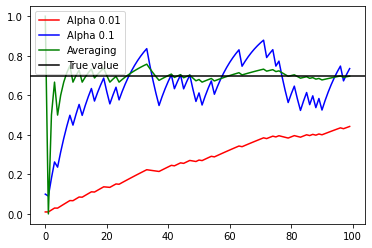

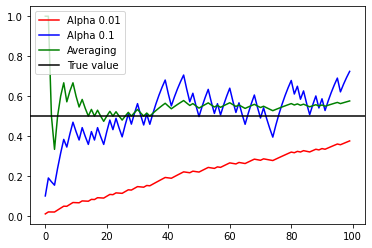

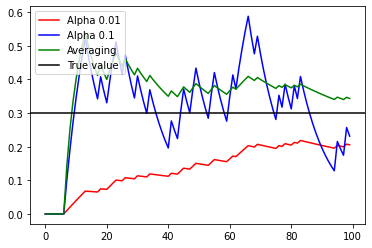

In [ ]:
# Run the function with the previous data
for i in range(0,3):
  Q1 = update(results[i], alpha = 0.01)
  Q2 = update(results[i], alpha = 0.1)
  Q3 = updateAVG(results[i])

  # plot the results
  plt.plot(np.arange(len(results[i])), Q1, 'r-', label = "Alpha 0.01")
  plt.plot(np.arange(len(results[i])), Q2, 'b-', label = "Alpha 0.1")
  plt.plot(np.arange(len(results[i])), Q3, 'g-', label = "Averaging")
  plt.axhline(y=probabilities[i], color='k', linestyle='-', label="True value")
  plt.legend(loc = "upper left")
  plt.show()

**Q4**

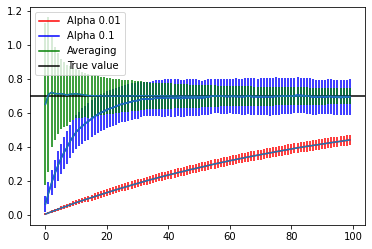

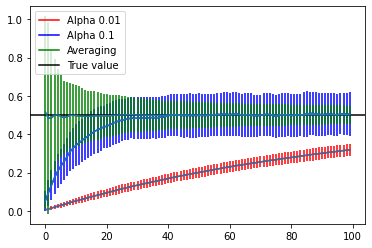

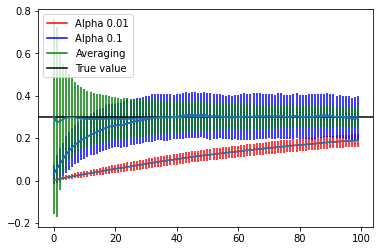

In [ ]:
Q1 = [[], [], []]
Q2 = [[], [], []]
Q3 = [[], [], []]
for k in range(0, 500):
  results = run()
  for i in range(0,3):
    Q1[i].append(update(results[i], alpha = 0.01))
    Q2[i].append(update(results[i], alpha = 0.1))
    Q3[i].append(updateAVG(results[i]))

for i in range(0,3):
  plt.plot(np.arange(len(results[i])), np.mean(np.array([j for j in Q1[i]]), axis=0), 'r-', label = "Alpha 0.01")
  plt.errorbar(np.arange(len(results[i])), np.mean(np.array([j for j in Q1[i]]), axis=0), yerr = np.std(np.array([j for j in Q1[i]]), axis=0), ecolor = 'r')
  plt.plot(np.arange(len(results[i])), np.mean(np.array([j for j in Q2[i]]), axis=0), 'b-', label = "Alpha 0.1")
  plt.errorbar(np.arange(len(results[i])), np.mean(np.array([j for j in Q2[i]]), axis=0), yerr = np.std(np.array([j for j in Q2[i]]), axis=0), ecolor = 'b')
  plt.plot(np.arange(len(results[i])), np.mean(np.array([j for j in Q3[i]]), axis=0), 'g-', label = "Averaging")
  plt.errorbar(np.arange(len(results[i])), np.mean(np.array([j for j in Q3[i]]), axis=0), yerr = np.std(np.array([j for j in Q3[i]]), axis=0), ecolor = 'g')
  plt.axhline(y=probabilities[i], color='k', linestyle='-', label="True value")
  plt.legend(loc = "upper left")
  plt.show()

**Q5**

In [ ]:
def greedy(epsilon, k = 3, delta = 0.2, decay = 1):
  bandit = Bandit([0.7,0.7-delta,0.3-2*delta]) # create bandit game
  Q = []
  N = []
  reward = []
  optimal = []
  expected = []
  for i in range(0, k): # initialize parameters
    Q.append(0)
    N.append(0)
  for i in range(0,1000):
    A = -1
    if (np.random.random() < epsilon): #choose action randomly based on epsilon
      A = np.random.randint(0, k)
    else: # choose randomly form the argmax Qs
      A = np.random.choice(np.flatnonzero(np.array(Q) == np.array(Q).max()))
    R = bandit.sample(A)
    # add statistics
    reward.append(R)
    expected.append(0.7-delta*A)
    optimal.append(np.random.choice(np.flatnonzero(np.array(Q) == np.array(Q).max())))
    N[A] = N[A]+1
    Q[A] = Q[A] + 1/N[A]*(R-Q[A])
    epsilon = epsilon*decay # decay, if it is 1, it does nothing
  return reward, optimal, expected

In [ ]:
def runGreedy(epsilon, delta = 0.2, decay = 1):
  color = ['r', 'b', 'g', 'm', 'c']

  rewards = [[],[],[],[],[]]
  optimals = [[],[],[],[],[]]
  regret = [[],[],[],[],[]]
  total_regret = [[],[],[],[],[]]

  for index, value in enumerate(epsilon):
    for k in range(0, 500):
      reward, Qs, expected = greedy(value, delta = delta, decay = decay)
      rewards[index].append(reward)
      optimals[index].append(Qs)
      regret[index].append(0.7 - np.array(expected))
      total_regret[index].append([0.7-expected[0]])
      for i in range(1,len(expected)):
        total_regret[index][k].append(total_regret[index][k][i-1]+regret[index][k][i])


  for i in range(0,len(epsilon)):
    #plt.plot(np.arange(len(rewards[i][0])), np.mean(np.array([j for j in rewards[i]]), axis=0), '.', color=color[i], label = str(epsilon[i]))
    plt.errorbar(np.arange(len(rewards[i][0])), np.mean(np.array([j for j in rewards[i]]), axis=0), yerr = np.std(np.array([j for j in rewards[i]]), axis=0), color = color[i], elinewidth=0.02,  label = str(epsilon[i]), ls = ':')
  plt.legend(loc = "upper left")
  plt.ylim(bottom=0, top=1)
  plt.show()
  for i in range(0,len(epsilon)):
    plt.plot(np.arange(len(optimals[i][0])), (500 - np.count_nonzero(np.array([j for j in optimals[i]]), axis=0))/5, '-', color=color[i], label = str(epsilon[i]))
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
  plt.legend(loc = "upper left")
  plt.show()
  for i in range(0,len(epsilon)):
    plt.plot(np.arange(len(regret[i][0])), np.mean(np.array([j for j in regret[i]]), axis=0), '-', color=color[i], label = str(epsilon[i]))
  plt.legend(loc = "upper left")
  plt.show()
  for i in range(0,len(epsilon)):
    plt.plot(np.arange(len(total_regret[i][0])), np.mean(np.array([j for j in total_regret[i]]), axis=0), '-', color=color[i], label = str(epsilon[i]))
  plt.legend(loc = "upper left")
  plt.show()

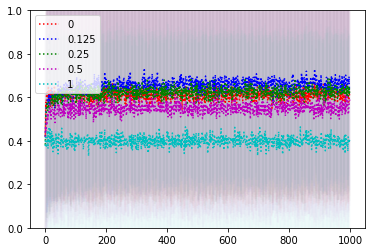

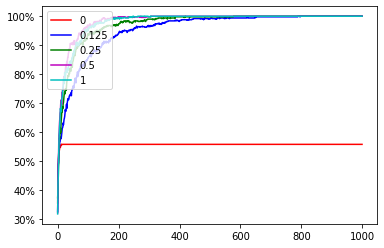

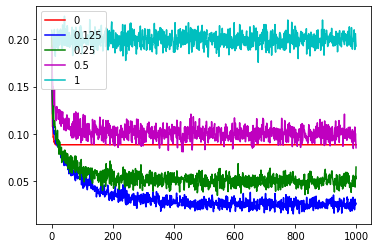

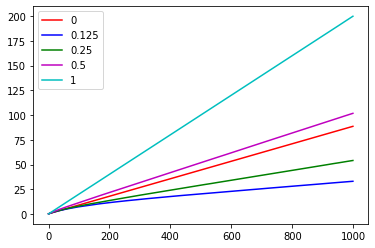

In [ ]:
runGreedy(epsilon = [0, 1/8, 1/4, 1/2, 1])

**Q6**

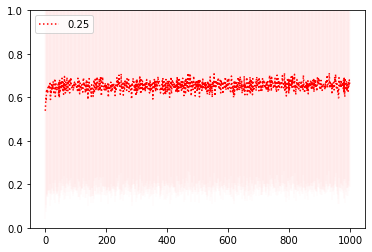

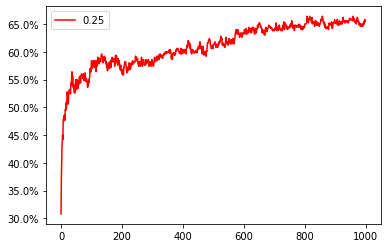

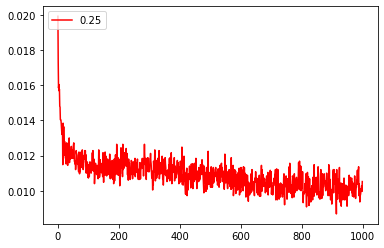

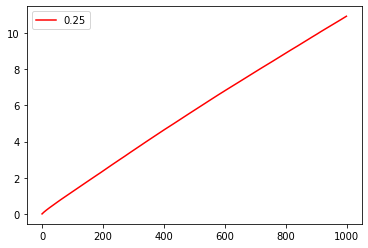

In [ ]:
runGreedy(epsilon = [1/4], delta = 0.02)

**Q7**

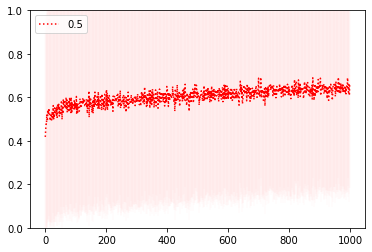

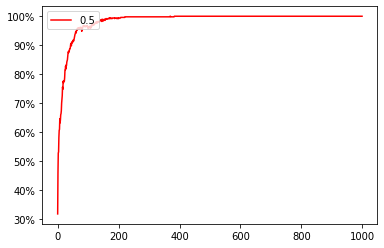

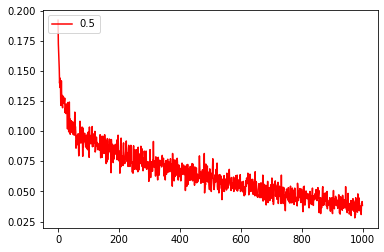

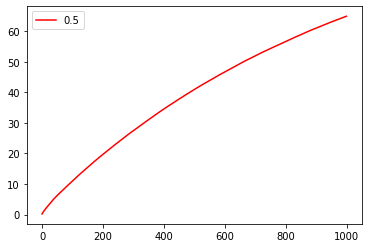

In [ ]:
runGreedy(epsilon = [1/2], delta = 0.2, decay = 0.999)

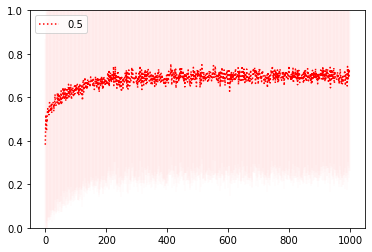

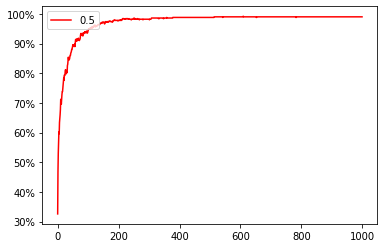

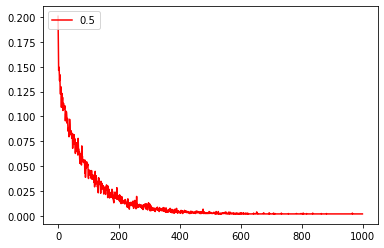

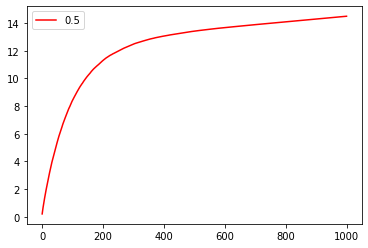

In [ ]:
runGreedy(epsilon = [1/2], delta = 0.2, decay = 0.99)

**Q8**

In [ ]:
# Define the bernoulli bandit game
class NonStationaryBandit:
  prob = []
  index = 0
  delta = 0.1

  def __init__(self, delta):
    self.delta = delta
    self.prob = [0.7, 0.7-delta, 0.7-2*delta] # given probabilities
  
  def sample(self, i): # give the reward based on bernouilli
    self.index += 1
    if (self.index > 500):
      self.prob = [0.7, 0.7+self.delta, 0.7+2*self.delta] # change probabilities
    return int(np.random.random() < self.prob[i])

In [ ]:
def greedy(epsilon, delta = 0.1, decay = 1, alpha = -1):
  bandit = NonStationaryBandit(delta) # create bandit game
  Q = []
  N = []
  reward = []
  for i in range(0, 3): # initialize parameters
    Q.append(0)
    N.append(0)
  for i in range(0, 1000):
    A = -1
    if (np.random.random() < epsilon): # select randomly based on epsilon the action
      A = np.random.randint(0, 3)
    else: # choose randomly between the max Qs
      A = np.random.choice(np.flatnonzero(np.array(Q) == np.array(Q).max()))
    R = bandit.sample(A)
    reward.append(R)
    
    if (alpha < 0): # update averaging if alpha not set
      N[A] = N[A]+1
      Q[A] = Q[A] + 1/N[A]*(R-Q[A])
    else: # update with alpha
      Q[A] = Q[A] + alpha*(R-Q[A])
    epsilon = epsilon*decay # decay, if it is 1 it does nothing
  return reward

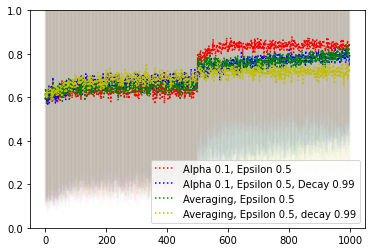

In [ ]:
alpha_epsilon = []
alpha_decay = []
averaging_epsilon = []
averaging_decay = []

# run 500 times
for i in range(0,500):
  alpha_epsilon.append(greedy(1/2, alpha = 0.1))
  alpha_decay.append(greedy(1/2, decay = 0.99, alpha = 0.1))
  averaging_epsilon.append(greedy(1/2))
  averaging_decay.append(greedy(1/2, decay = 0.99))

# plot the means an errobars
plt.errorbar(np.arange(len(alpha_epsilon[0])), np.mean(np.array([j for j in alpha_epsilon]), axis=0), yerr = np.std(np.array([j for j in alpha_epsilon]), axis=0), color = 'r', elinewidth=0.03,  label = 'Alpha 0.1, Epsilon 0.5', ls = ':')
plt.errorbar(np.arange(len(alpha_decay[0])), np.mean(np.array([j for j in alpha_decay]), axis=0), yerr = np.std(np.array([j for j in alpha_decay]), axis=0), color = 'b', elinewidth=0.03,  label = 'Alpha 0.1, Epsilon 0.5, Decay 0.99', ls = ':')
plt.errorbar(np.arange(len(averaging_epsilon[0])), np.mean(np.array([j for j in averaging_epsilon]), axis=0), yerr = np.std(np.array([j for j in averaging_epsilon]), axis=0), color = 'g', elinewidth=0.03,  label = 'Averaging, Epsilon 0.5', ls = ':')
plt.errorbar(np.arange(len(averaging_decay[0])), np.mean(np.array([j for j in averaging_decay]), axis=0), yerr = np.std(np.array([j for j in averaging_decay]), axis=0), color = 'y', elinewidth=0.03,  label = 'Averaging, Epsilon 0.5, decay 0.99', ls = ':')
plt.legend(loc = "lower right")
plt.ylim(bottom=0, top=1)
plt.show()

**Q9**

In [ ]:
def softmax(T, bandit, delta = 0.2):
  Q = np.zeros(3) # initialize Q and N
  N = np.zeros(3)
  reward = []
  for i in range(0, 1000):
    Pr = np.exp(Q/T)/np.sum(np.exp(Q/T)) # find probability for each action
    A = -1

    # choose action based on probability
    rand = np.random.random()
    for k in range(0,3):
      if (rand < Pr[k]):
        A = k
        break
      Pr[k+1] += Pr[k]

    R = bandit.sample(A) # sample action
    reward.append(R)
    
    # update Q
    N[A] = N[A] + 1
    Q[A] = Q[A] + 1/N[A]*(R-Q[A])

  return reward

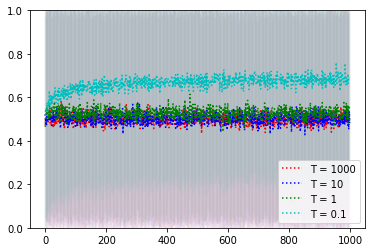

In [ ]:
T_1000 = []
T_10 = []
T_1 = []
T_01 = []

# Run for 500 times for each T
for i in range(0, 500):
  T_1000.append(softmax(1000, Bandit([0.7, 0.5, 0.3]))) # create bandit game))
  T_10.append(softmax(10, Bandit([0.7, 0.5, 0.3]))) # create bandit game))
  T_1.append(softmax(1, Bandit([0.7, 0.5, 0.3])))
  T_01.append(softmax(0.1, Bandit([0.7, 0.5, 0.3])))

plt.errorbar(np.arange(len(T_1000[0])), np.mean(np.array([j for j in T_1000]), axis=0), yerr = np.std(np.array([j for j in T_1000]), axis=0), color = 'r', elinewidth=0.03,  label = 'T = 1000', ls = ':')
plt.errorbar(np.arange(len(T_10[0])), np.mean(np.array([j for j in T_10]), axis=0), yerr = np.std(np.array([j for j in T_10]), axis=0), color = 'b', elinewidth=0.03,  label = 'T = 10', ls = ':')
plt.errorbar(np.arange(len(T_1[0])), np.mean(np.array([j for j in T_1]), axis=0), yerr = np.std(np.array([j for j in T_1]), axis=0), color = 'g', elinewidth=0.03,  label = 'T = 1', ls = ':')
plt.errorbar(np.arange(len(T_01[0])), np.mean(np.array([j for j in T_01]), axis=0), yerr = np.std(np.array([j for j in T_01]), axis=0), color = 'c', elinewidth=0.03,  label = 'T = 0.1', ls = ':')
plt.legend(loc = "lower right")
plt.ylim(bottom=0, top=1)
plt.show()

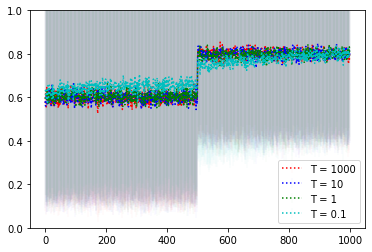

In [ ]:
T_1000 = []
T_10 = []
T_1 = []
T_01 = []

# Run for 500 times for each T
for i in range(0, 500):
  T_1000.append(softmax(1000, NonStationaryBandit(0.1))) # create bandit game))
  T_10.append(softmax(10, NonStationaryBandit(0.1))) # create bandit game))
  T_1.append(softmax(1, NonStationaryBandit(0.1)))
  T_01.append(softmax(0.1, NonStationaryBandit(0.1)))

plt.errorbar(np.arange(len(T_1000[0])), np.mean(np.array([j for j in T_1000]), axis=0), yerr = np.std(np.array([j for j in T_1000]), axis=0), color = 'r', elinewidth=0.03,  label = 'T = 1000', ls = ':')
plt.errorbar(np.arange(len(T_10[0])), np.mean(np.array([j for j in T_10]), axis=0), yerr = np.std(np.array([j for j in T_10]), axis=0), color = 'b', elinewidth=0.03,  label = 'T = 10', ls = ':')
plt.errorbar(np.arange(len(T_1[0])), np.mean(np.array([j for j in T_1]), axis=0), yerr = np.std(np.array([j for j in T_1]), axis=0), color = 'g', elinewidth=0.03,  label = 'T = 1', ls = ':')
plt.errorbar(np.arange(len(T_01[0])), np.mean(np.array([j for j in T_01]), axis=0), yerr = np.std(np.array([j for j in T_01]), axis=0), color = 'c', elinewidth=0.03,  label = 'T = 0.1', ls = ':')
plt.legend(loc = "lower right")
plt.ylim(bottom=0, top=1)
plt.show()